In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

# Problem 1

I got 62 % right answers. The answer that two billion children will there be in the year 2100 according to the United Nations, which is same number of children in the world today, suprised me. Since I thought there would be more children in the future 80 years.

I choose the question 'How did the number of deaths per year from natural disasters change over the last hundred years?' and I re-state it as how is the death cause by earthquake distribution over the last years in different continents?

In [77]:
earthqk_death = pd.read_csv('ddf--datapoints--earthquake_deaths_annual_number--by--geo--time.csv')
geo = pd.read_csv('ddf--entities--geo--country.csv')
geo = geo[['country','name','world_4region']]
geo.columns = ['country','name','continents']

In [79]:
cont_earthqk_death = earthqk_death.merge(geo,left_on='geo',right_on='country')

In [81]:
earthqk_death_time_cont = cont_earthqk_death.groupby(['time','continents']).sum().reset_index()

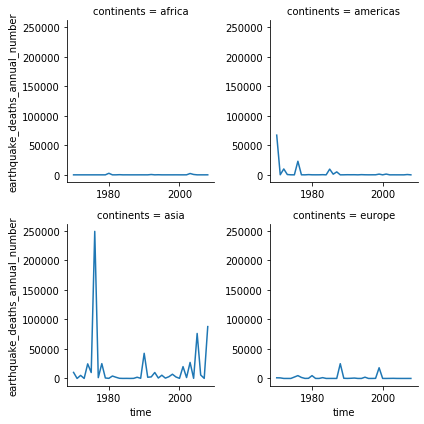

In [83]:
conti = sns.FacetGrid(earthqk_death_time_cont,col='continents',col_wrap=2)
conti.map(plt.plot,'time','earthquake_deaths_annual_number')

Interpretation:

The number of death caused by earthquake per year is steady in recent years for Africa, America and Europe. However, the trend for Asian area is unstable. Based on previous history, earthquake is more frequently happened in Asian than other continents.

# Problem 2

In [2]:
gdp = pd.read_csv('ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
gdp_merged = gdp.merge(geo,left_on='geo',right_on='country')
gdp_merged.columns = ['geo','time','gdp','country','name','continents']

In [5]:
gdp_time_cont = gdp_merged.groupby(['time','continents']).mean().reset_index()

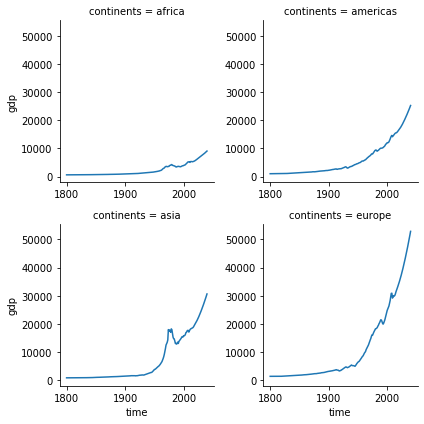

In [6]:
conti = sns.FacetGrid(gdp_time_cont,col='continents',col_wrap=2)
conti.map(plt.plot,'time','gdp')

In [7]:
gdp_asia = gdp_merged[gdp_merged['continents']=='asia']

In [8]:
gdp_americas = gdp_merged[gdp_merged['continents']=='americas']

In [9]:
gdp_africa = gdp_merged[gdp_merged['continents']=='africa']

In [10]:
gdp_europe = gdp_merged[gdp_merged['continents']=='europe']

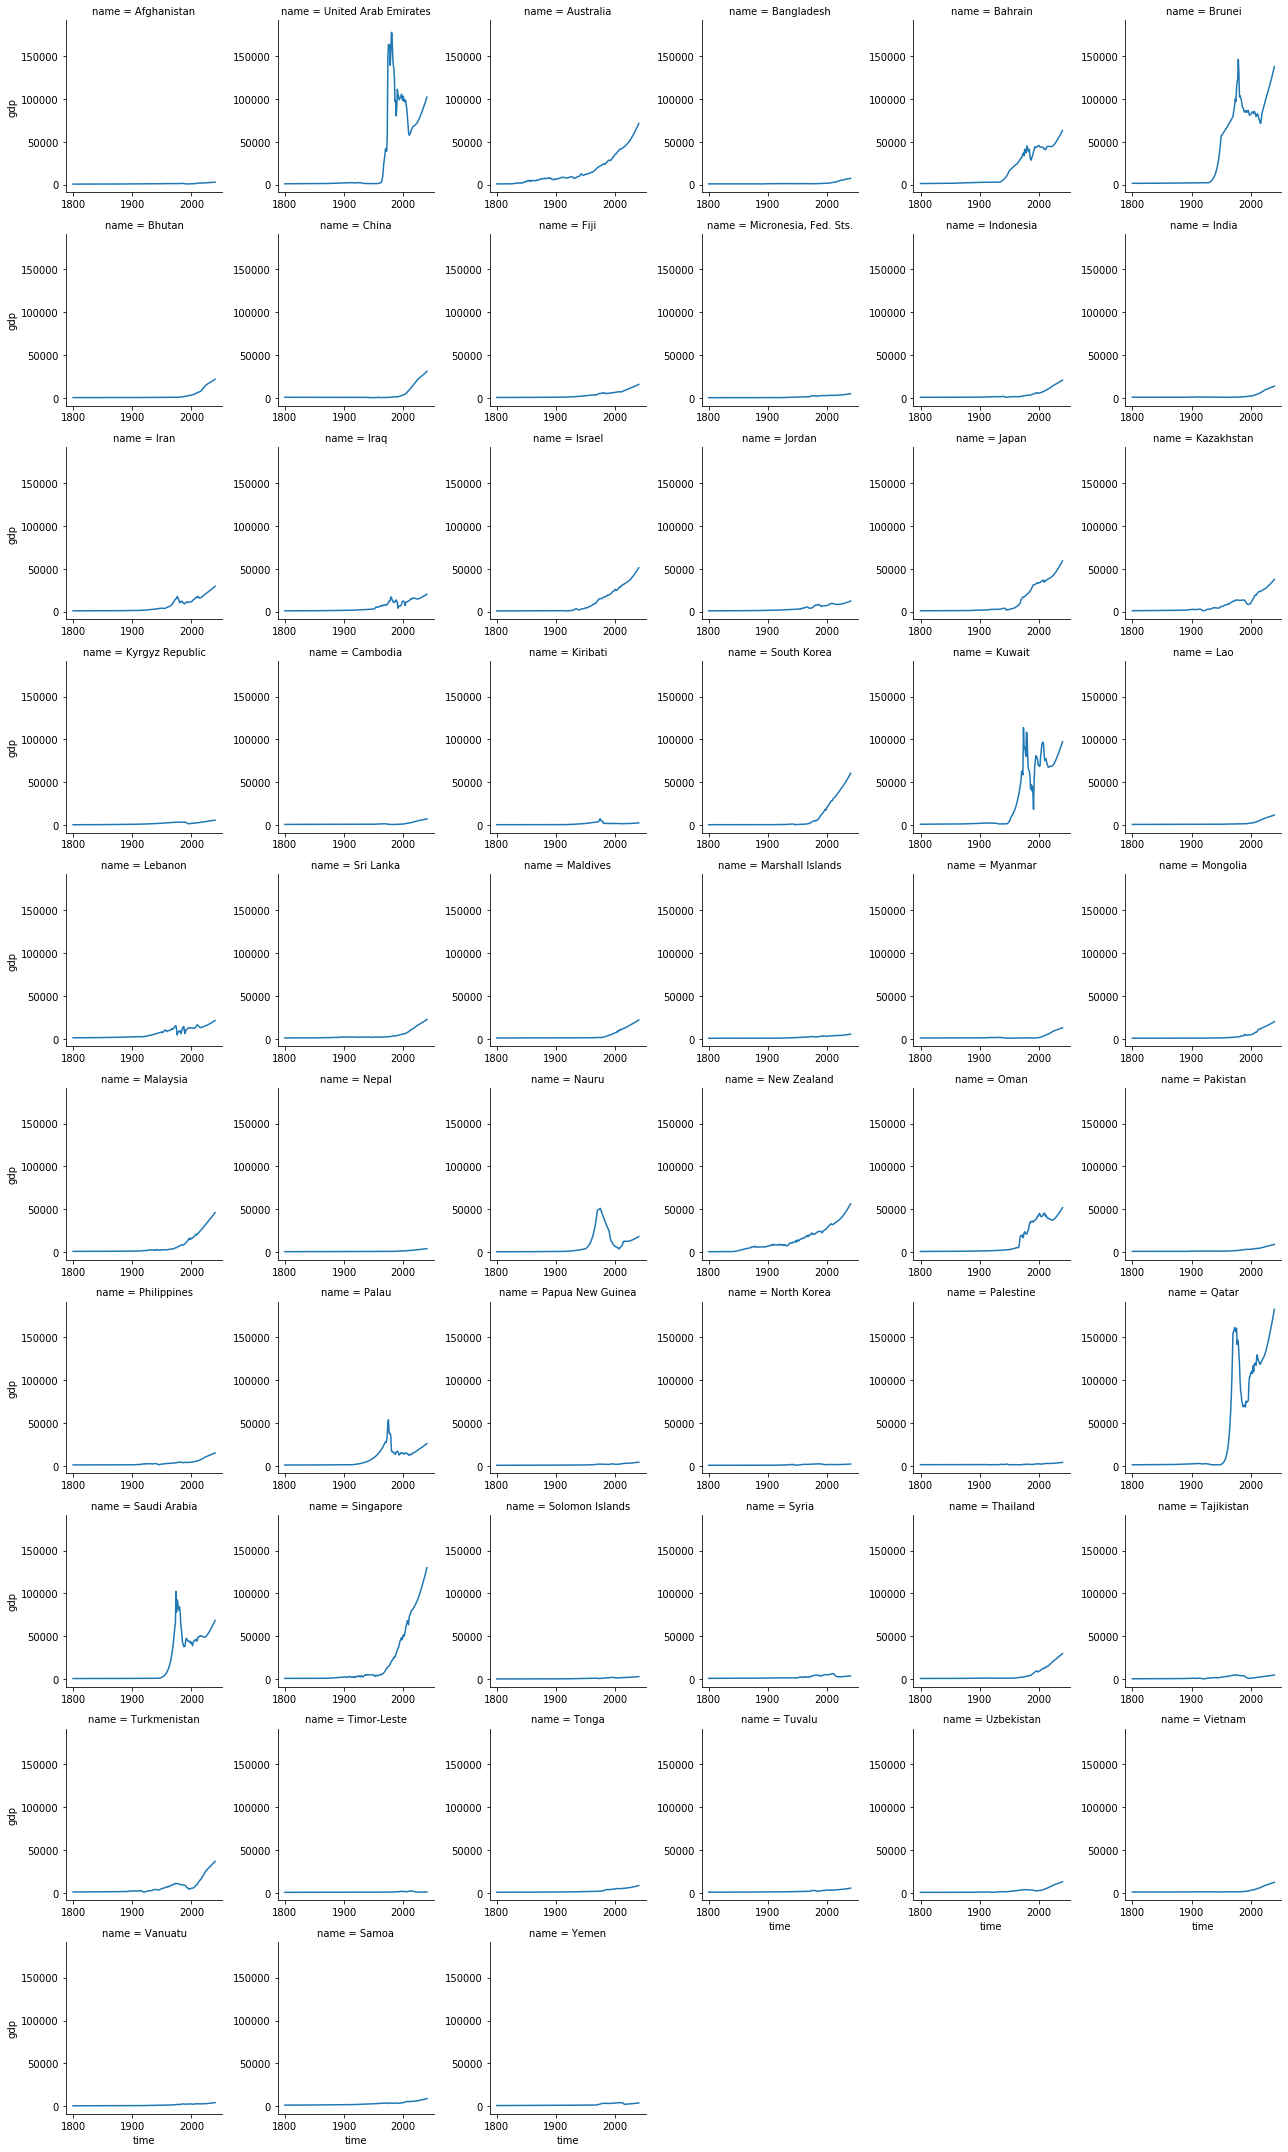

In [121]:
asia = sns.FacetGrid(gdp_asia,col='name',col_wrap=6)
asia.map(plt.plot,'time','gdp')

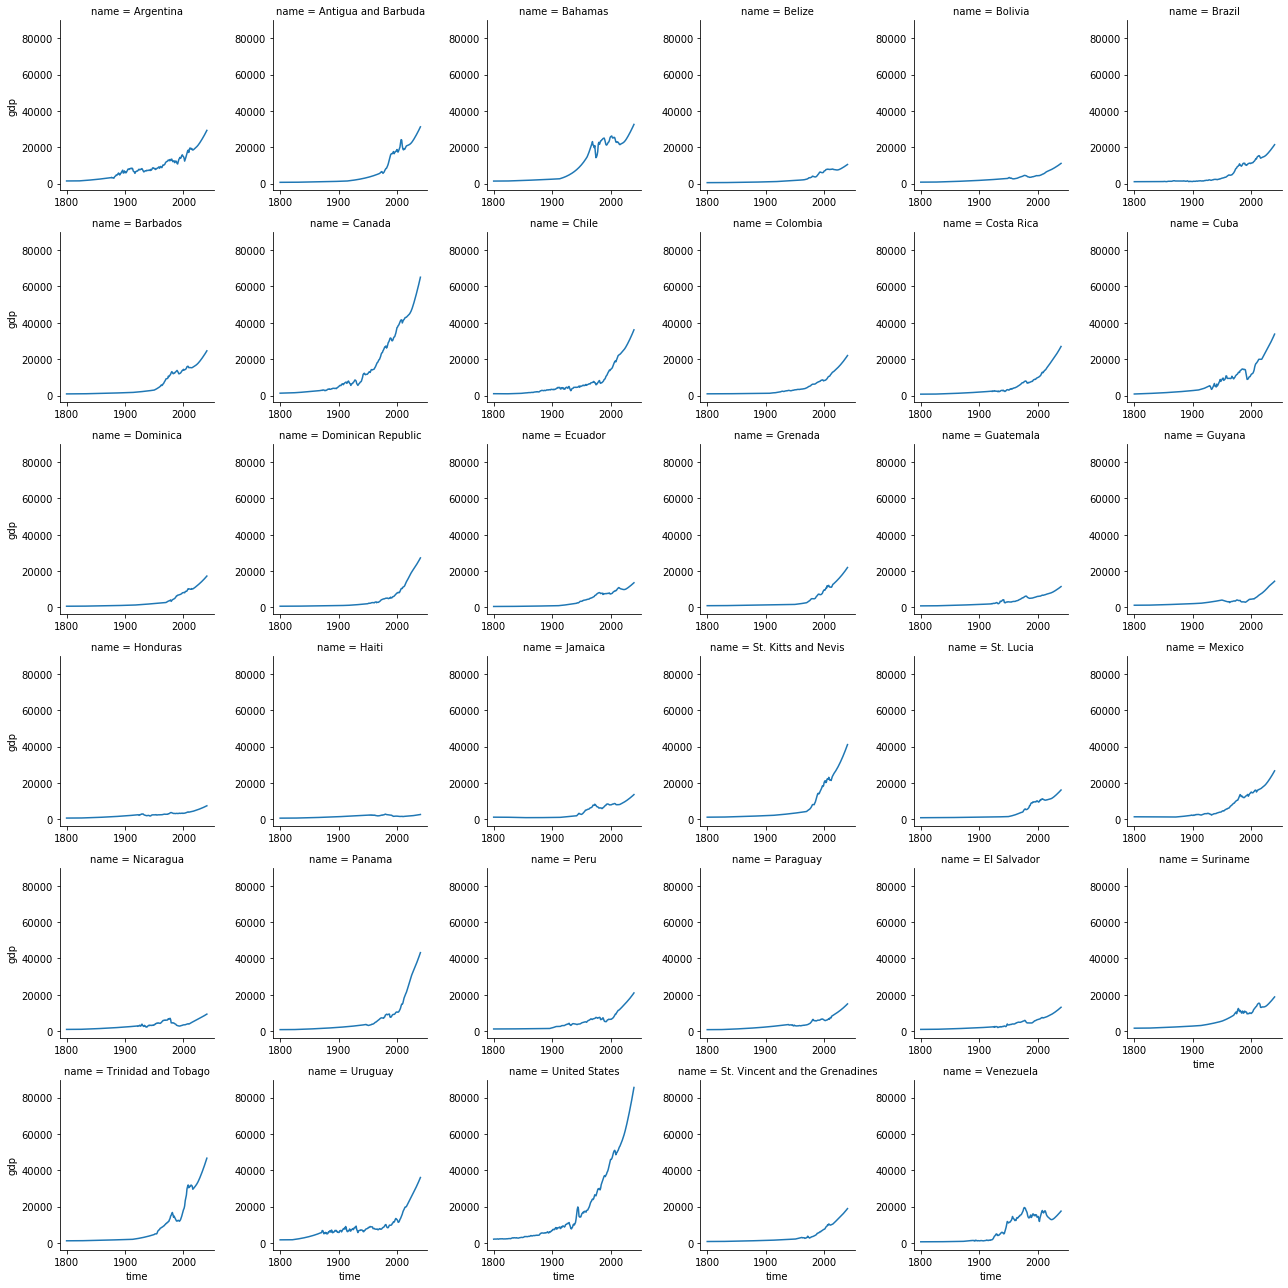

In [124]:
americas = sns.FacetGrid(gdp_americas,col='name',col_wrap=6)
americas.map(plt.plot,'time','gdp')

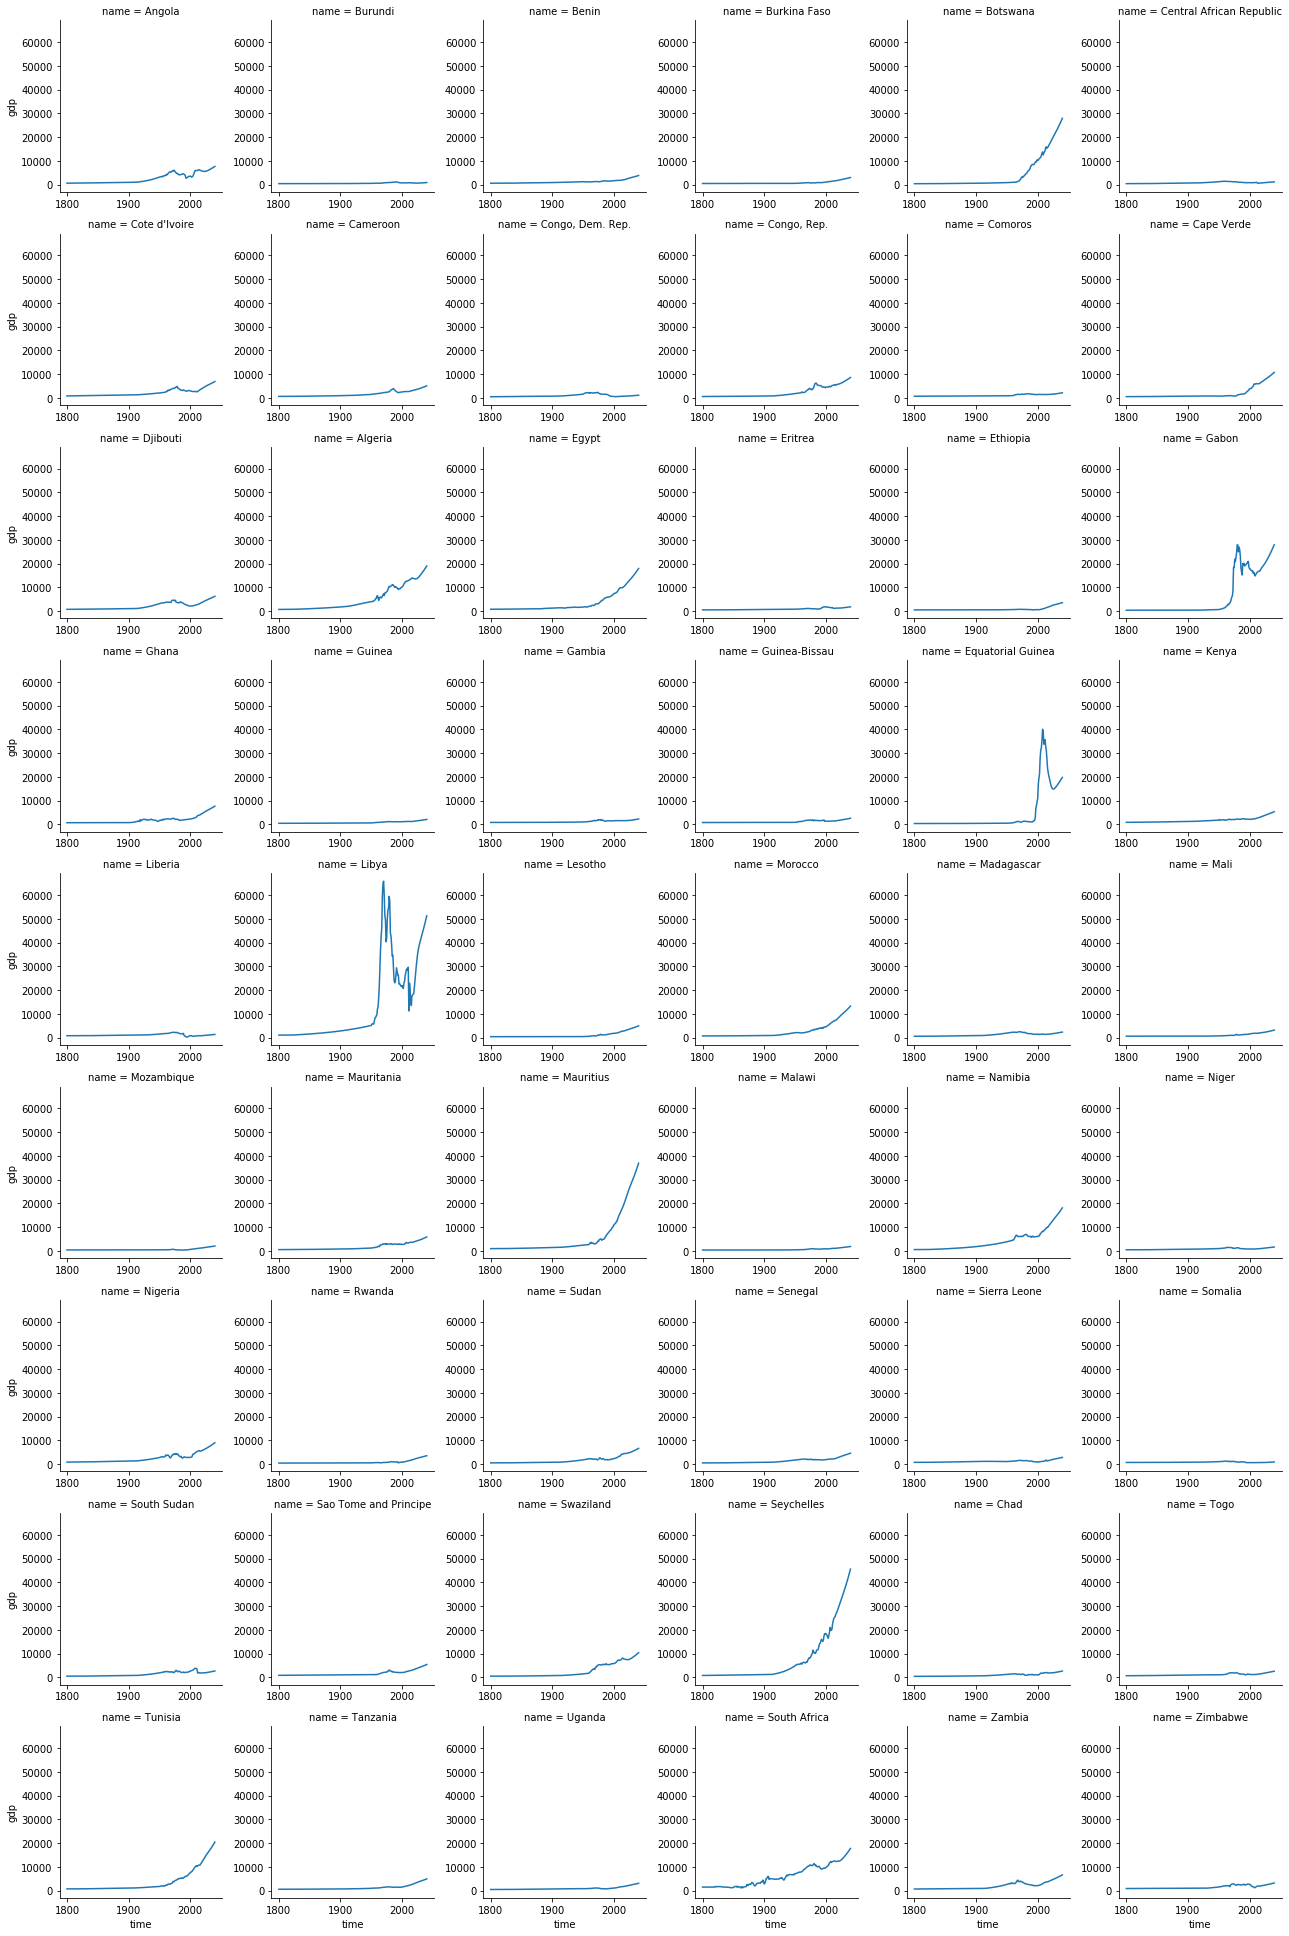

In [122]:
africa = sns.FacetGrid(gdp_africa,col='name',col_wrap=6)
africa.map(plt.plot,'time','gdp')

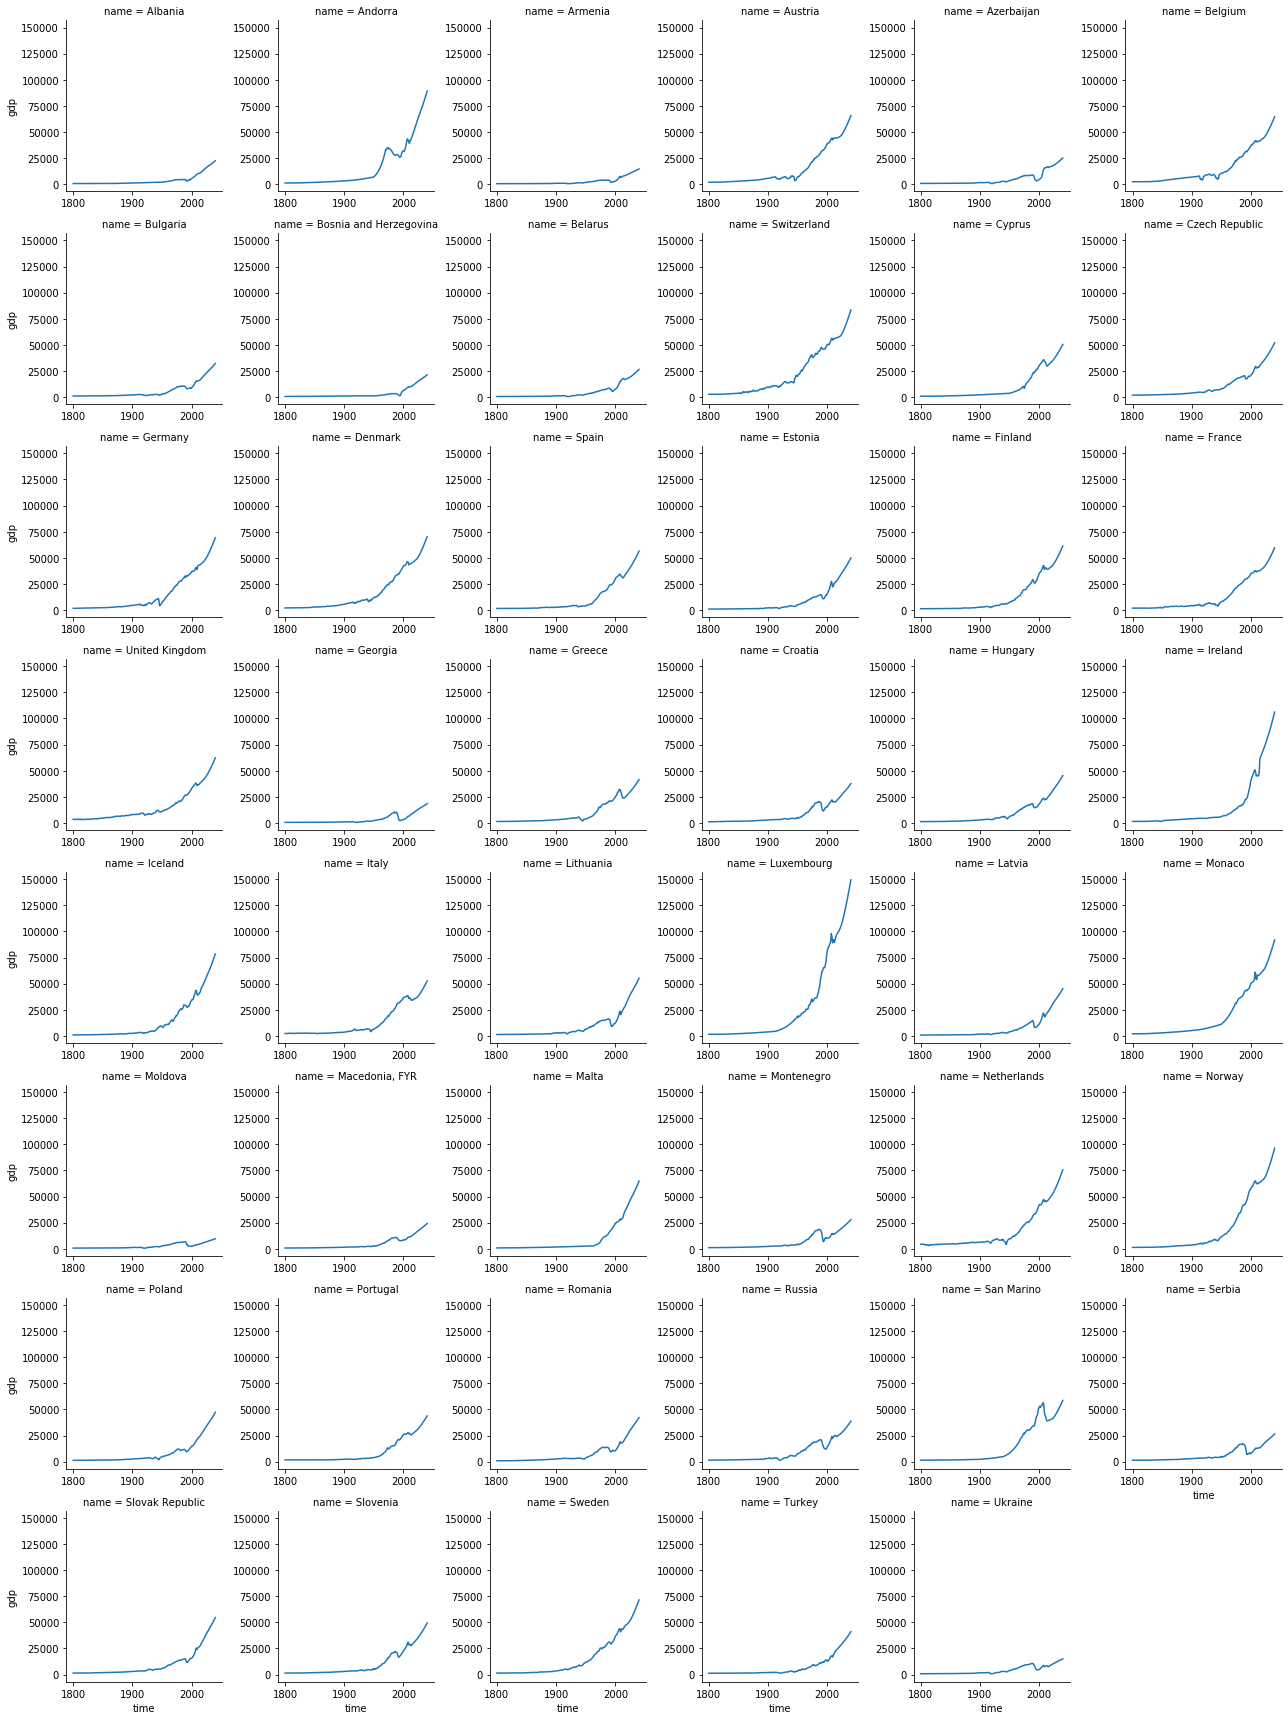

In [123]:
europe = sns.FacetGrid(gdp_europe,col='name',col_wrap=6)
europe.map(plt.plot,'time','gdp')

Interpretation:

For the four continents, Europe is the one has the fastest average growth rate in gdp and Africa is the one with the slowest. Although, the overall trend of GDP in the world is increasing, for some of the Asian country, there is a noticeable drop between 1900s and 2000s. 

Caveats：

Although the overall trend of GDP is increasing in the world, the difference between different country is extremely huge. The GDP development of some country in Africa is far from some developed country in Europe and America. There are still a lot work need to be done to help those countries get rid of poverty.

# Problem 3

In [ ]:
child_mrt = pd.read_csv('ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')

In [ ]:
life_exp = pd.read_csv('ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [35]:
life_chlid=life_exp.merge(child_mrt,left_on=['geo','time'],right_on=['geo','time'])

In [37]:
gdp_life_chlid = life_chlid.merge(gdp,left_on=['geo','time'],right_on=['geo','time'])

In [40]:
cont_gdp_life_chlid = gdp_life_chlid.merge(geo,left_on='geo',right_on='country')

In [45]:
avg = cont_gdp_life_chlid.groupby(['time','world_4region']).mean().reset_index()

In [47]:
avg.columns = ['time','continents','life_expectancy','child_mortality_per_1000','gdp']

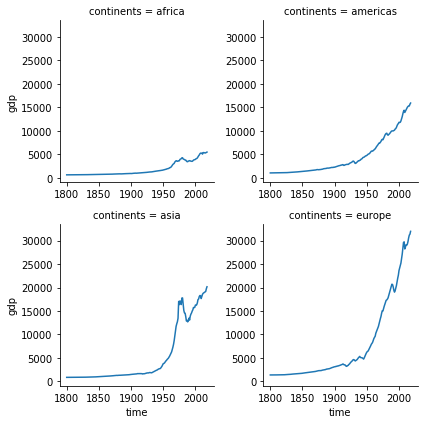

In [54]:
gdp_g = sns.FacetGrid(avg,col='continents',col_wrap=2)
gdp_g.map(plt.plot,'time','gdp')

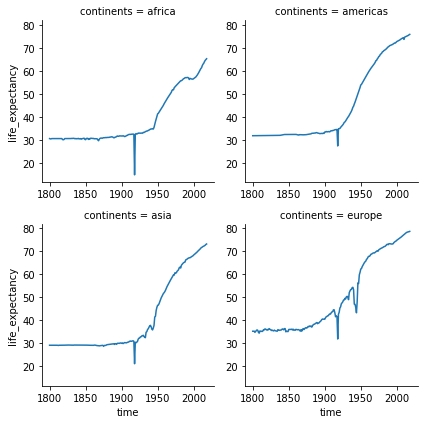

In [53]:
life_g = sns.FacetGrid(avg,col='continents',col_wrap=2)
life_g.map(plt.plot,'time','life_expectancy')

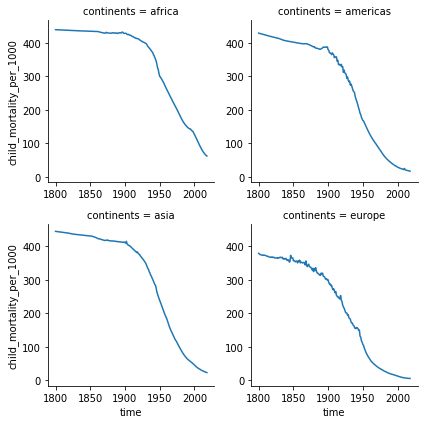

In [55]:
child_g = sns.FacetGrid(avg,col='continents',col_wrap=2)
child_g.map(plt.plot,'time','child_mortality_per_1000')

Interpretation:

Based on the above plots, we could know that the GDP and life expectancy of people is increasing over time for all four continents. And the child mortality is decreasing. The reason of this would be people tend to live a better life as GDP is increasing. They get better medical treatment for disease. So the life expectancy is higher and child is less likely to mortality. However, there is a noticeable drop in life expectancy in both of the four continents at the same time. This might be related to the worldwide war.

# Problem 4

In [91]:
planted = pd.read_csv('ddf--datapoints--planted_forest_area_ha--by--geo--time.csv')
co2 = pd.read_csv('ddf--datapoints--yearly_co2_emissions_1000_tonnes--by--geo--time.csv')

In [97]:
planted_co2 = planted.merge(co2,left_on=['geo','time'],right_on=['geo','time'])

In [107]:
planted_co2_cont = planted_co2.merge(geo,left_on='geo',right_on='country').groupby(['time','continents']).mean().reset_index()

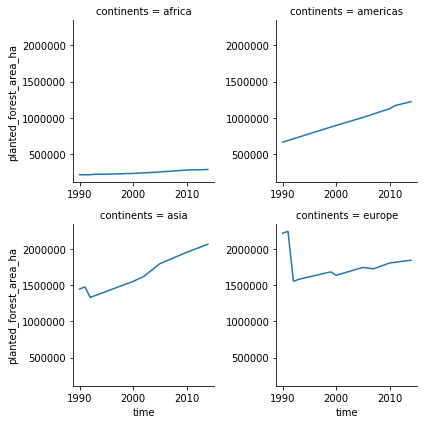

In [110]:
planted_g = sns.FacetGrid(planted_co2_cont,col='continents',col_wrap=2)
planted_g.map(plt.plot,'time','planted_forest_area_ha')

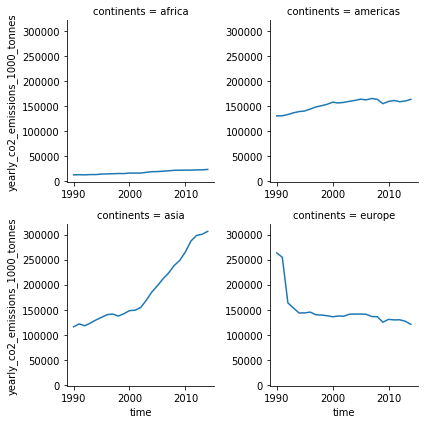

In [112]:
co2_g = sns.FacetGrid(planted_co2_cont,col='continents',col_wrap=2)
co2_g.map(plt.plot,'time','yearly_co2_emissions_1000_tonnes')

Interpretation:

 Usually, the planted forest area is nagatively related to the CO2 emission. In other words, there is less CO2 emission when there are more planted forest. Although all the continents tend to plant more forest over the twenty years, only Europe has a decreasing trend of CO2 emission. More surprisingly, the CO2 emission of Asian is increasing rapidly. We need find a effccient and fast way to decrease the CO2 emission to keep earth getting warmer and warmer.

# Problem 5

I use static plots to answer the previous problems. After I explored the data using the interactive visualization tools and watched video. I find following advantages, disadvantages, and relative usefulness of using interactive/dynamic visualizations versus static visualizations.

Advantages:

Interactive/dynamic visualizations contain more information and improve the way that we can access and interact with information compared with static visualizations.

Interactive/dynamic visualizations is more easily understandable for audience during a presentation procedure without much explanation.

Disadvantages:

 Interactive/dynamic visualizations are not appropriate for a formal paper or documentation.

Innovative and beatiful Interactive/dynamic visualizations take much more time to design and lay out than static visualizations

Relative usefulness：

As mentioned above, Interactive/dynamic visualizations are more useful when conducting a presentation or the audiences do not have much relevant domain knowledge. However, for a formal paper or documentation, static visualizations might be more appropriate and useful.